In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# read the file and see data type

In [3]:
df_melb = pd.read_csv('melb_data.csv')
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [4]:
df_melb.head(10)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
5  7/05/2016       2.5    3067.0  ...       1.0  0.0     181.0           NaN   
6  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
7  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   
8  8/10/2016       2.5    3067.0  ...       1.0  1.0       0.0           NaN   
9  8/10/2016       2.5    3067.0  ...       1.0  2.0     220.0          75.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   
5        NaN        Yarra  -37.8041    144.9953  Northern Metropolitan   
6     1910.0        Yarra  -37.8024    144.9993  Northern Metropolitan   
7     1890.0        Yarra  -37.8060    144.9954  Northern Metropolitan   
8        NaN        Yarra  -37.8008    144.9973  Northern Metropolitan   
9     1900.0        Yarra  -37.8010    144.9989  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  
5        4019.0  
6        4019.0  
7        4019.0  
8        4019.0  
9        4019.0  

[10 rows x 21 columns]

In [5]:
df_melb.tail(10)

Suburb        Address  Rooms Type      Price Method  \
13570  Wantirna South  34 Fewster Dr      3    h   970000.0      S   
13571  Wantirna South     15 Mara Cl      4    h  1330000.0      S   
13572        Watsonia  76 Kenmare St      2    h   650000.0     PI   
13573        Werribee    5 Nuragi Ct      4    h   635000.0      S   
13574     Westmeadows     9 Black St      3    h   582000.0      S   
13575   Wheelers Hill   12 Strada Cr      4    h  1245000.0      S   
13576    Williamstown  77 Merrett Dr      3    h  1031000.0     SP   
13577    Williamstown    83 Power St      3    h  1170000.0      S   
13578    Williamstown   96 Verdon St      4    h  2500000.0     PI   
13579      Yarraville     6 Agnes St      4    h  1285000.0     SP   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
13570          Barry  26/08/2017      14.7    3152.0  ...       2.0  2.0   
13571          Barry  26/08/2017      14.7    3152.0  ...       2.0  2.0   
13572       Morrison  26/08/2017      14.5    3087.0  ...       1.0  1.0   
13573  hockingstuart  26/08/2017      14.7    3030.0  ...       2.0  1.0   
13574            Red  26/08/2017      16.5    3049.0  ...       2.0  2.0   
13575          Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0   
13576       Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0   
13577          Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0   
13578        Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0   
13579        Village  26/08/2017       6.3    3013.0  ...       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
13570     674.0           NaN        NaN          NaN -37.88360   145.22805   
13571     717.0         191.0     1980.0          NaN -37.86887   145.22116   
13572     210.0          79.0     2006.0          NaN -37.70657   145.07878   
13573     662.0         172.0     1980.0          NaN -37.89327   144.64789   
13574     256.0           NaN        NaN          NaN -37.67917   144.89390   
13575     652.0           NaN     1981.0          NaN -37.90562   145.16761   
13576     333.0         133.0     1995.0          NaN -37.85927   144.87904   
13577     436.0           NaN     1997.0          NaN -37.85274   144.88738   
13578     866.0         157.0     1920.0          NaN -37.85908   144.89299   
13579     362.0         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
13570        Eastern Metropolitan        7082.0  
13571        Eastern Metropolitan        7082.0  
13572       Northern Metropolitan        2329.0  
13573        Western Metropolitan       16166.0  
13574       Northern Metropolitan        2474.0  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[10 rows x 21 columns]

## transfer Date to datetime type

In [6]:
df_melb['Date'] = pd.to_datetime(df_melb['Date'])
df_melb

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG       Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin 2016-03-12       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin 2016-04-02       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin 2017-04-03       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin 2017-04-03       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson 2016-04-06       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...        ...       ...       ...  ...       ...  ...       ...   
13575     Barry 2017-08-26      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams 2017-08-26       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine 2017-08-26       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney 2017-08-26       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village 2017-08-26       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

## view the null value

In [7]:
df_melb.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

In [184]:
df_melb.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

## Observe the correlations between the data

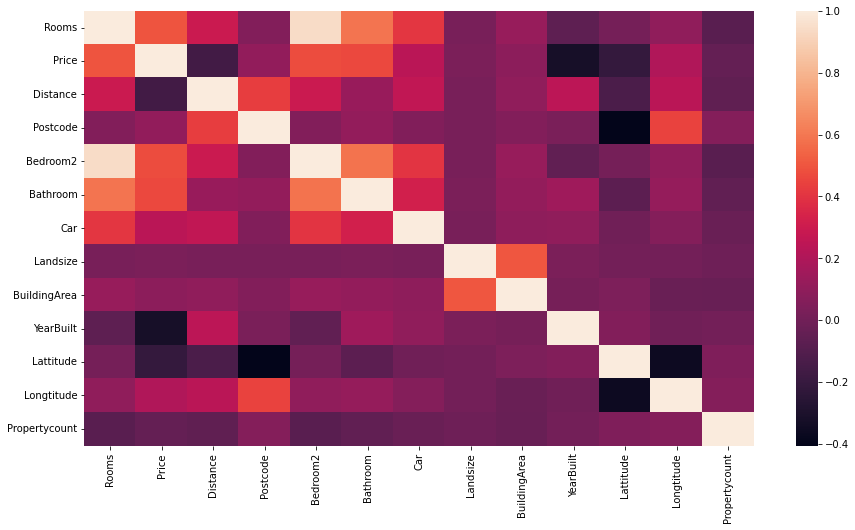

In [8]:
plt.rcParams["figure.figsize"] = 15,8
sns.heatmap(df_melb.corr())

## Pie graph text format function

In [81]:
def BuildingArea_range_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, len(df_melb['BuildingArea_range'].dropna())*x/100)

In [89]:
def Price_range_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, len(df_melb['Price_range'].dropna())*x/100)

In [83]:
def Distance_range_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, len(df_melb['Distance_range'].dropna())*x/100)

## housing trade distribution function

In [9]:
def Distribution(x_axis,axis):#Differences in the number of housing trades
    
    x_axis.sort_values() 
    xx = x_axis.unique() 
    yy = x_axis.value_counts()

    axis.bar(xx, yy, width=0.3, facecolor='#9999ff')
    a=np.arange(len(xx))
    for a,b in zip(a, yy):
        axis.text(a, b, '%.0f'%b, ha='center', va='bottom', fontsize=10)
    axis.set_title('Distribution by %s'%x_axis.name)    

## price range distribution function

In [10]:
def price_distribution(hue,t,axis):
    axis = sns.countplot(x='Price_range', hue=hue, data=df_melb[df_melb['Type'] == t])
    axis.set_title('{0} type price range distribution of different {1}'.format(t,hue),fontsize=20)
    Mark_numbers(axis,12)

## Mark number on seaborn graph function

In [11]:
def Mark_numbers(axis,size):
    for p in axis.patches:
        axis.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=size,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

## Average price distribution function

In [12]:
def avg_price_bar(x, axis):
    if x == 'Rooms':
        avg_price = df_melb[[x,'Price']].groupby(x).mean().reset_index()
    else:
        avg_price = df_melb[[x,'Price']].groupby(x).mean().sort_values(by='Price', ascending=False).reset_index()
    #print(avg_price)
    axis.bar(avg_price[x].apply(str),avg_price['Price'],facecolor='#9999ff')
    a=np.arange(len(avg_price[x]))
    for a,b in zip(a, avg_price['Price']):
        axis.text(a, b, '%.1f'%b, ha='center', va='bottom', fontsize=14)
    #plt.xticks(rotation=45)

    axis.set_title('Average house prices in %s'%x)

## Top sellers

In [188]:
pd.set_option('display.max_rows', None)
xx = df_melb['SellerG'].unique() 
yy = df_melb['SellerG'].value_counts()
yy

Nelson                     1565
Jellis                     1316
hockingstuart              1167
Barry                      1011
Ray                         701
Marshall                    659
Buxton                      632
Biggin                      393
Brad                        342
Fletchers                   301
Woodards                    301
Jas                         243
Greg                        239
McGrath                     222
Sweeney                     216
Noel                        205
Miles                       196
RT                          184
Gary                        170
Harcourts                   168
Hodges                      157
YPA                         154
Stockdale                   150
Village                     125
Kay                         119
Raine                       116
Williams                    111
Love                        109
Douglas                      97
Chisholm                     77
RW                           70
Rendina 

## Distribution of housing trade by different Type, Method, Rigion, Council area 
    

    The graph on the top left shows the distribution of transactions for the three different types of houses over the period, with Type H having the highest number of sales with 9,449, Type U with 3,017 and Type t with the lowest with only 1114.
    The graph on the top right shows the distribution of transactions for the different saling method of houses over the period, 9,022 houses were sold by S, which is the most, and the lowest number of houses sold was by SA with only 92.
    The graph on the bottom left shows the distribution of the number of houses sold in the different regions, with relatively high numbers in regions Northern Metropolitan, Western Metropolitan and Southern Metropolitan, with the highest number being Northern Metropolitan, where 4,695 houses were sold during the period. The number of houses sold in Victoria is relatively low.
    The graph on the bottom right shows the number of housing sold in each concil area.

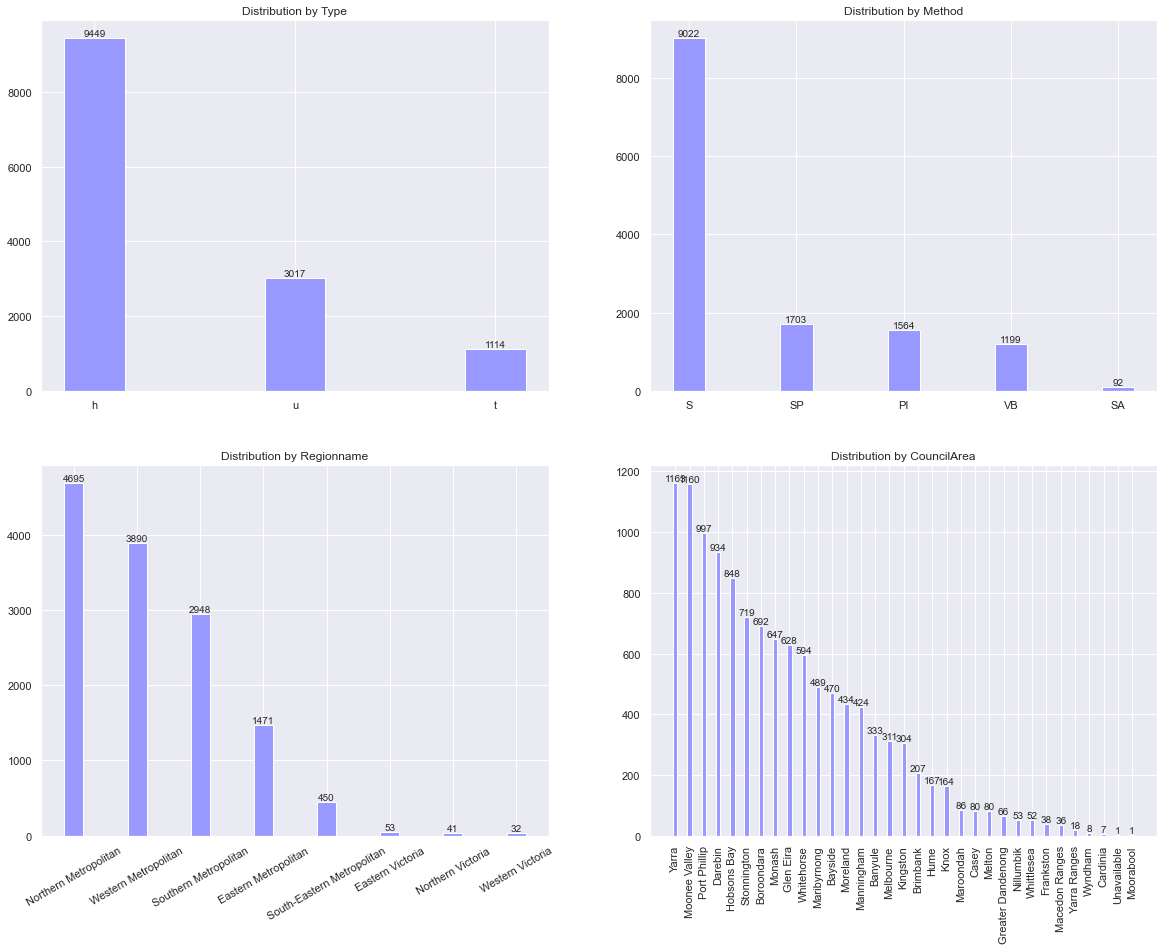

In [189]:
sns.set_theme()
figure, axis = plt.subplots(2, 2,figsize=(20, 15))
Distribution(df_melb['Type'],axis[0,0])
Distribution(df_melb['Method'],axis[0,1])
Distribution(df_melb['Regionname'],axis[1,0])
Distribution(df_melb['CouncilArea'].dropna(),axis[1,1])
axis[1,0].tick_params(axis='x', labelrotation=30)
axis[1,1].tick_params(axis='x', labelrotation=90)

## Price_range column
    To visualise the distribution of price ranges, I set the prices into six ranges and added a new column called 'price_range' 

In [28]:
cut_labels1 = ['0-500,000', '500,000-750,000', '750,000-1,000,000', '1,000,000-1,500,000','1,500,000-2,000,000', '2,000,000+']
cut_bins1 = [0, 500000, 750000, 1000000, 1500000, 2000000, 9000000000]
df_melb['Price_range'] = pd.cut(df_melb['Price'], bins=cut_bins1, labels=cut_labels1)
df_melb['Price_range'].describe()

count                   13580
unique                      6
top       1,000,000-1,500,000
freq                     3282
Name: Price_range, dtype: object

## Distance_range column
    To visualise the distribution of Distance ranges, I set the Distance into six ranges and added a new column called 'Distance_range' 

In [29]:
cut_labels2 = ['0-5', '5-10', '10-15', '15-20','20-30', '30+']
cut_bins2 = [0, 5, 10,15, 20, 30, 100000]
df_melb['Distance_range'] = pd.cut(df_melb['Distance'], bins=cut_bins2, labels=cut_labels2)
df_melb['Distance_range'].describe()

count     13574
unique        6
top        5-10
freq       5097
Name: Distance_range, dtype: object

## Building area range column

In [203]:
cut_labels3 = ['0-50', '50-100', '100-150', '150-300','300-500', '500+']
cut_bins3 = [0, 50, 100, 150, 300, 500, 100000000]
df_melb['BuildingArea_range'] = pd.cut(df_melb['BuildingArea'], bins=cut_bins3, labels=cut_labels3)
df_melb['BuildingArea_range'].describe()

count        7113
unique          6
top       100-150
freq         2511
Name: BuildingArea_range, dtype: object

## Price range distribution
    

As you can see from this pie chart, the number of houses above 750,000 and below 2 million is the highest, especially those between 1 million and 1.5 million sold 3,281 units, accounting for 24.17% of the total, while a relatively small percentage of houses above 2 million and below 750,000.

24.167893826961517
23.755523562431335
22.194403409957886
11.759941279888153
10.70692166686058
7.415316998958588


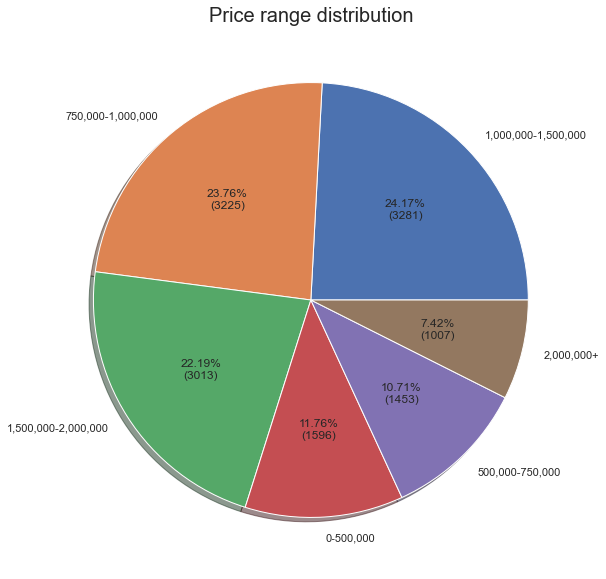

In [194]:
figure, axis = plt.subplots(figsize=(10, 10))
df_melb['Price_range'].sort_values() 
xx = df_melb['Price_range'].dropna().unique() 
yy = df_melb['Price_range'].dropna().value_counts()
#print(yy)
axis.set_title('Price range distribution',fontsize=20)
axis = plt.pie(yy,labels=xx,autopct=Distance_range_fmt,shadow=True)
a=np.arange(len(xx))

## Price range distribution by different housing types

As can be seen that, most 'u' type houses' price were in the range of '0-750,000, and for the 'h' type houses, the distribution in the 1,000,000-1,500,000 price range is the most frequent,'t' type houses are mainly distributied in the price range of 500000-750,000, 750,000-1,000,000 and 1,000,000-1,500,000.

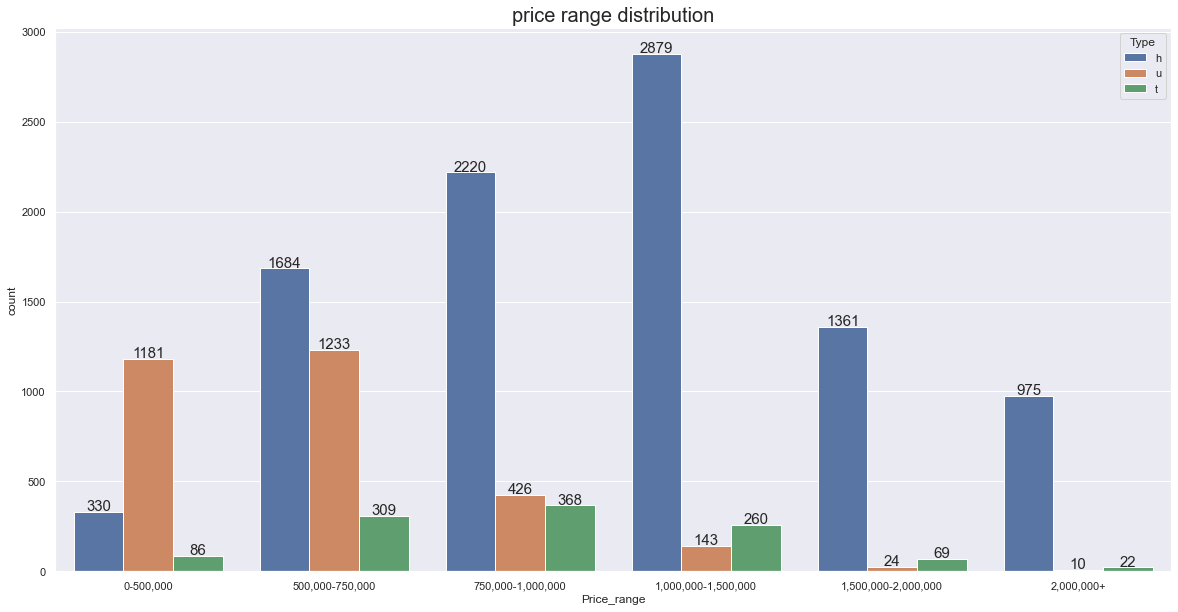

In [193]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='Price_range', hue='Type', data=df_melb)
axis.set_title('price range distribution',fontsize=20)
Mark_numbers(axis,15)

## Price distribution comparision by type and region
    The first chart shows the price distribution of house in different areas, first of all, the main price range of house in the northern metropolis, western metropolis and southeastern metropolis is 500000-750000, 750000-1000000, 1000000-150000, the price distribution of house in the southern metropolis will be relatively high, mainly concentrated The price distribution of houses in the southern metropolis will be relatively high, mainly concentrated above 100000, the houses in the eastern metropolis will be more in the range of 1000000-1500000, the house price in East Victoria are basically 7500000-1000000, the house prices in North Victoria are basically also within 1000000, the house prices in West Victoria are within 500000

    The first graph shows the distribution of unit prices in different regions. Firstly, the selling prices of units in the Northern Metropolis and Western Metropolis regions are mainly concentrated in the range of 0-750,000 and the higher the price, the less the distribution, the prices of units in the Southern Metropolis region are mainly distributed in the range of 0-1,000,000 and the highest range is 500,000-750,000, the prices of units in the South East Metropolis are basically 500,000-75,000 and a total of 3 units were sold in the East Victoria region.
    
    

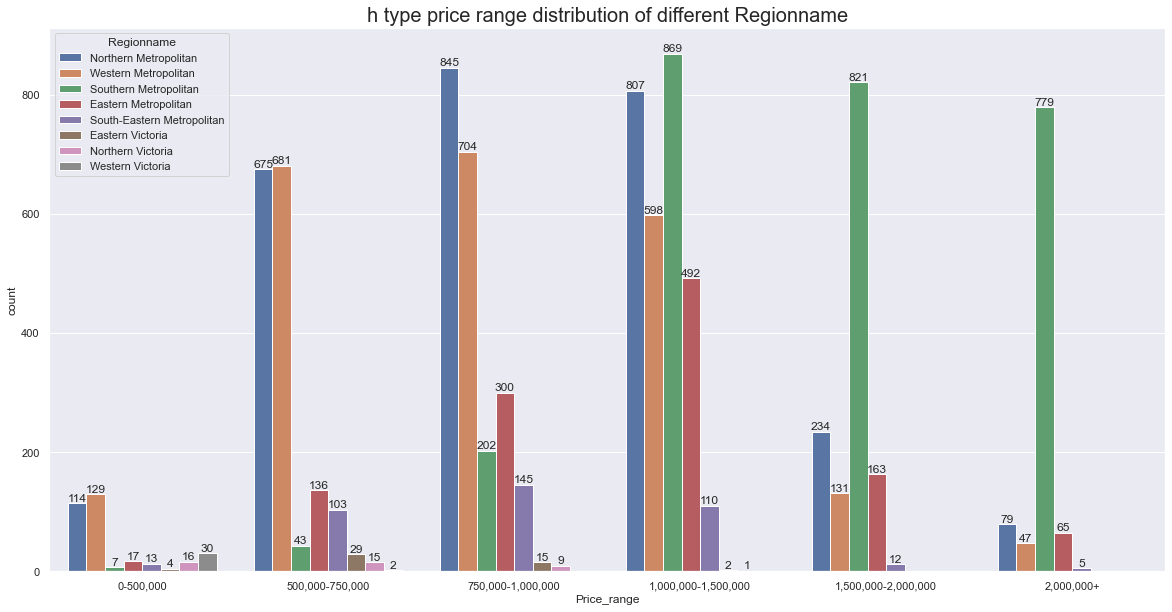

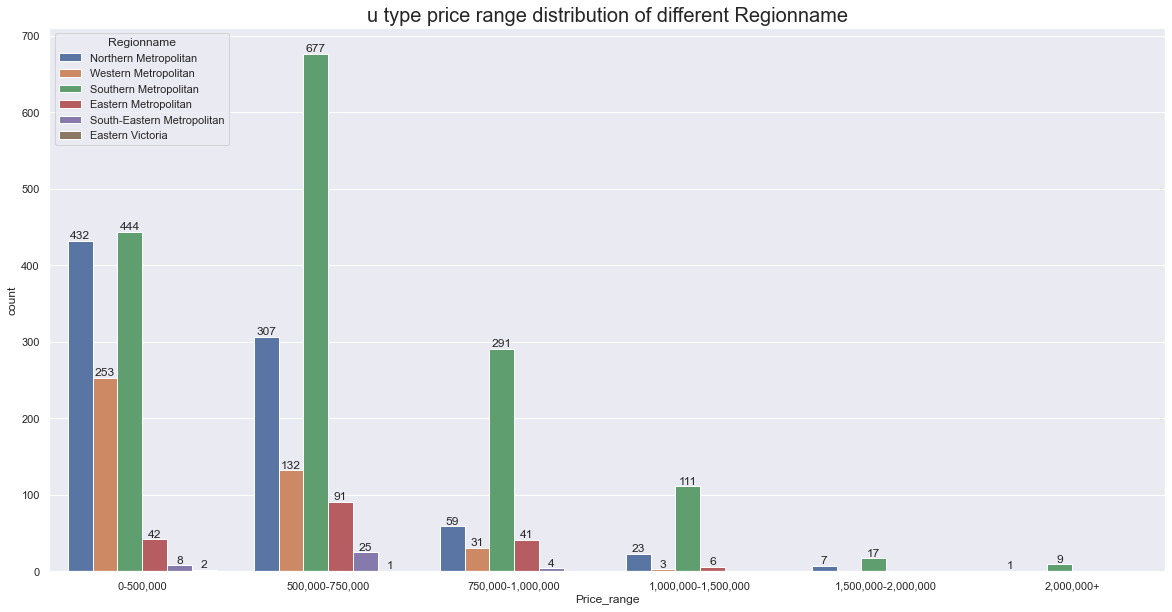

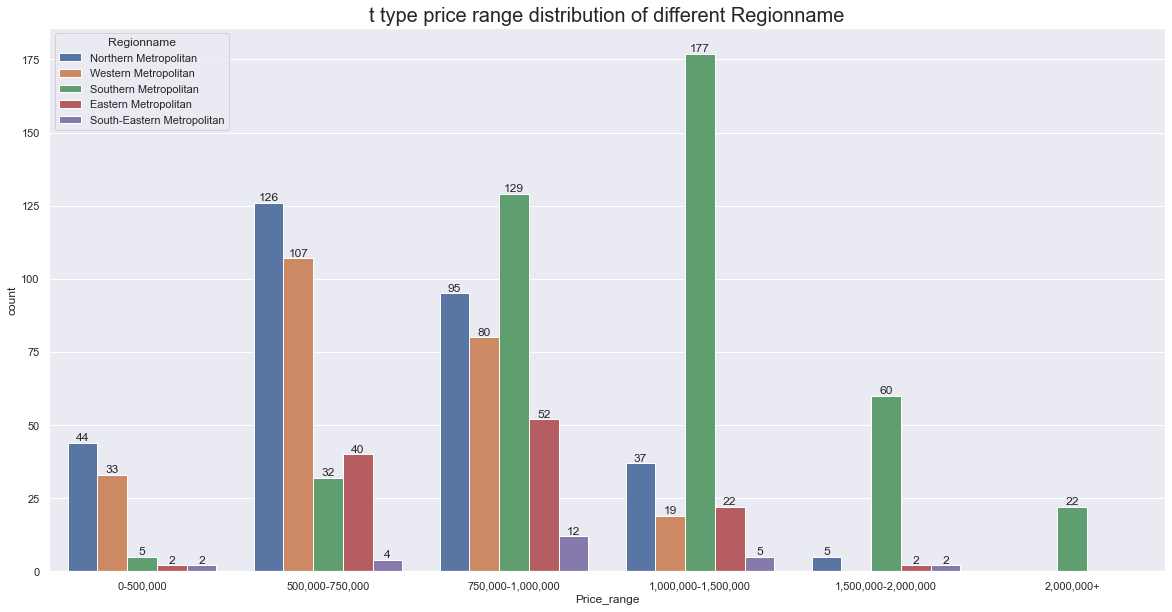

In [32]:
figure1, axis1 = plt.subplots(figsize=(20, 10))
price_distribution('Regionname','h',axis1)
figure2, axis2 = plt.subplots(figsize=(20, 10))
price_distribution('Regionname','u',axis2)
figure3, axis3 = plt.subplots(figsize=(20, 10))
price_distribution('Regionname','t',axis3)

## Number of houses sold per month by type
    As we can see from the graph, monthly house trade were generally higher in 2017 than in the same period in 2016, peaking in August 2017, with 800
    The peak in unit trade volumes was in July 2016, which is 251
    The peak in town trade volumes was in May 2017, which is 102

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

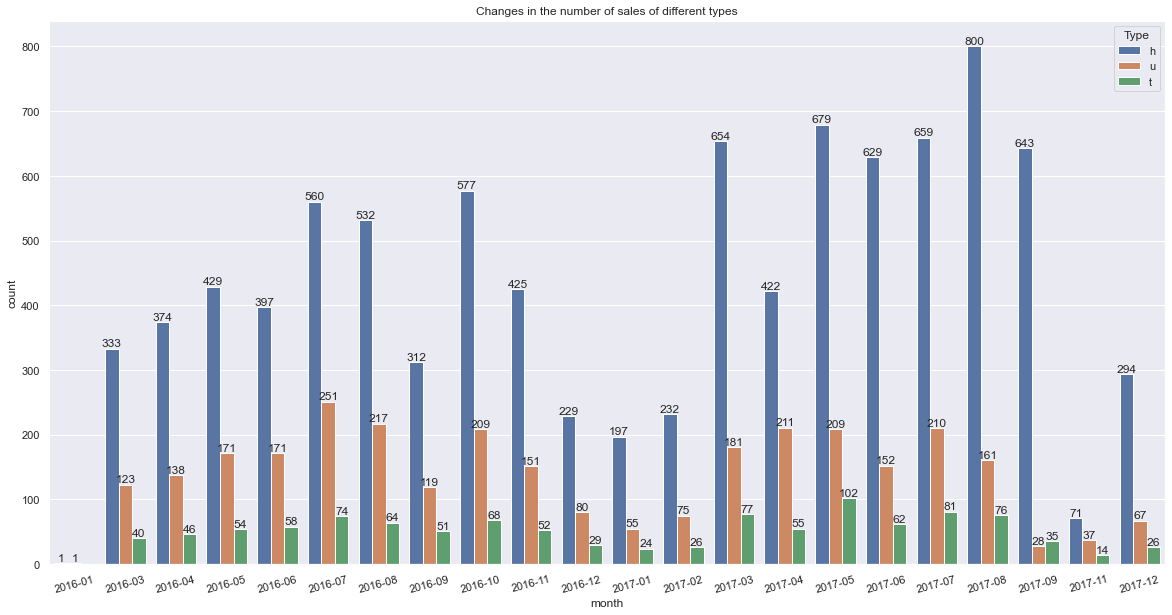

In [214]:
df_melb['month'] = df_melb['Date'].dt.to_period('M')
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x="month", hue="Type", data=df_melb,order = df_melb['month'].sort_values().unique())
axis.set_title('Changes in the number of sales of different types')
Mark_numbers(axis,12)
plt.xticks(rotation=15)


## relation between price and distance
We did not find a clear correlation between price and distance from this

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


corr: -0.1625218378638254


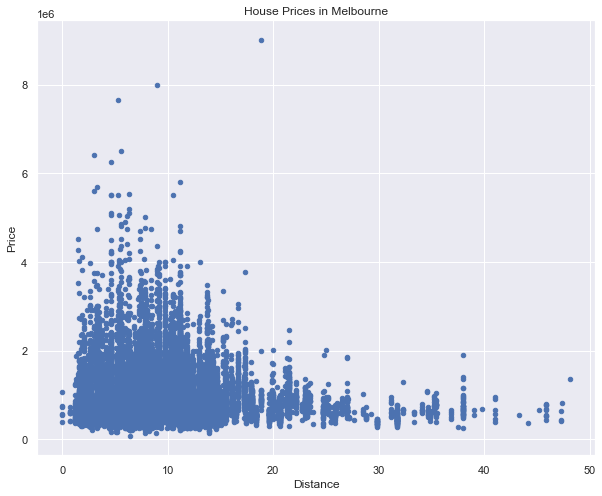

In [196]:
df_melb.plot(x='Distance', y='Price', kind='scatter',title='House Prices in Melbourne')
#tried to plot with pandas directly
print('corr:',df_melb['Distance'].corr(df_melb['Price']))

## distance range distribution
    From the pie chart we can see that houses 0-5km from the city centre and 10-15km sold the most, followed by 5-10km, with the other houses relatively far from the city centre not having a very high distribution.

5-10     5097
10-15    4604
0-5      2231
15-20     911
20-30     518
30+       213
Name: Distance_range, dtype: int64
37.54972815513611
33.917784690856934
16.435833275318146
6.711360067129135
3.816119208931923
1.5691762790083885


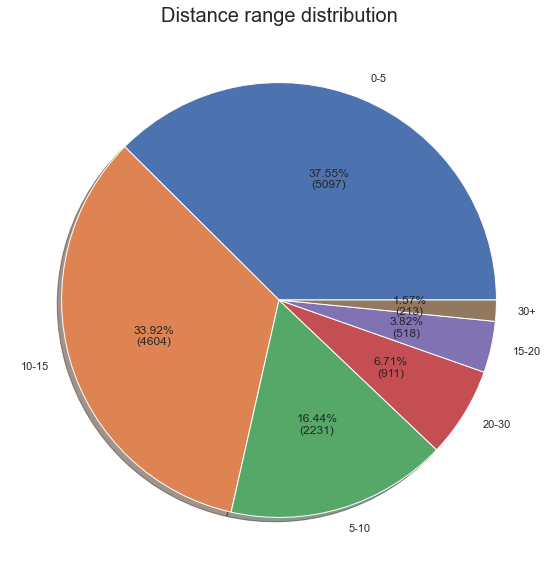

In [88]:
figure, axis = plt.subplots(figsize=(10, 10))
df_melb['Distance_range'].sort_values() 
xx = df_melb['Distance_range'].dropna().unique() 
yy = df_melb['Distance_range'].dropna().value_counts()
#print(yy)
axis.set_title('Distance range distribution',fontsize=20)
axis = plt.pie(yy,labels=xx,autopct=Distance_range_fmt,shadow=True)
a=np.arange(len(xx))

## distance range distribution on price range

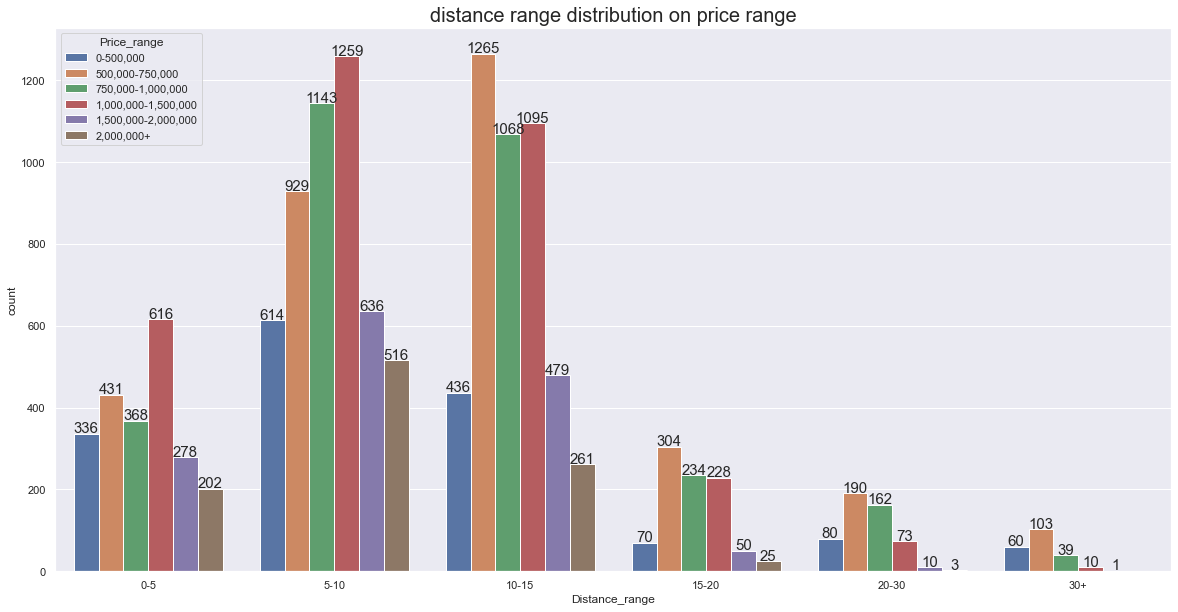

In [35]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='Distance_range',hue = 'Price_range', data=df_melb)
axis.set_title('distance range distribution on price range',fontsize=20)
Mark_numbers(axis,15)

## relation between price and BuildingArea

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.0909806076842059

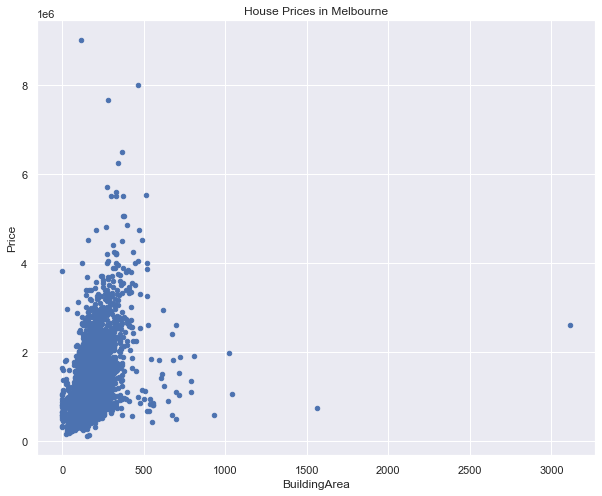

In [198]:
df_melb.dropna().plot(x='BuildingArea', y='Price', kind='scatter',title='House Prices in Melbourne')
df_melb['Price'].corr(df_melb['BuildingArea'])

## BuildingArea range distribution
    As we can see from the pie chart, the house size range is mainly in the 50-300 sqm range, with the largest number of 50-100 sqm being 2511, accounting for over 35% of the total.

In [206]:
#figure, axis = plt.subplots(figsize=(20, 10))
#axis = sns.countplot(x='BuildingArea_range', data=df_melb)
#axis.set_title('BuildingArea range distribution',fontsize=20)
#Mark_numbers(axis,15)

35.301560163497925
29.818642139434814
25.755658745765686
4.442569985985756
3.7958666682243347
0.8857022039592266


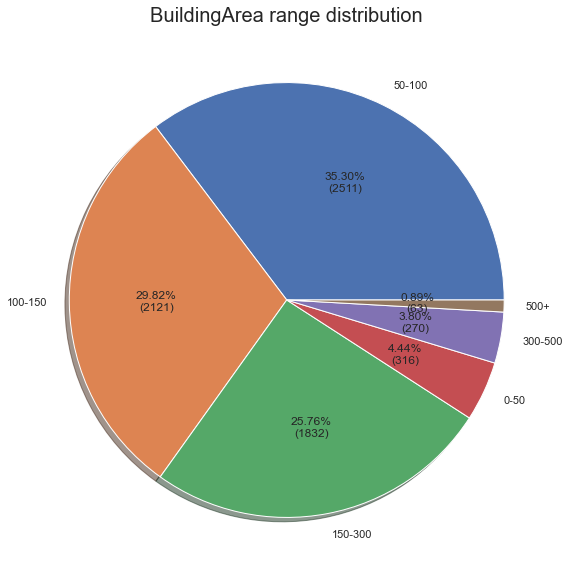

In [208]:
figure, axis = plt.subplots(figsize=(10, 10))
df_melb['BuildingArea_range'].sort_values() 
xx = df_melb['BuildingArea_range'].dropna().unique() 
yy = df_melb['BuildingArea_range'].dropna().value_counts()
#print(yy)
axis.set_title('BuildingArea range distribution',fontsize=20)
axis = plt.pie(yy,labels=xx,autopct=BuildingArea_range_fmt,shadow=True)


## BuildingArea range distribution on types
    From the chart we can see that the house and town sizes are mainly distributed between 100-300 sqm and the unit is mainly distributed between 50-100 sqm.

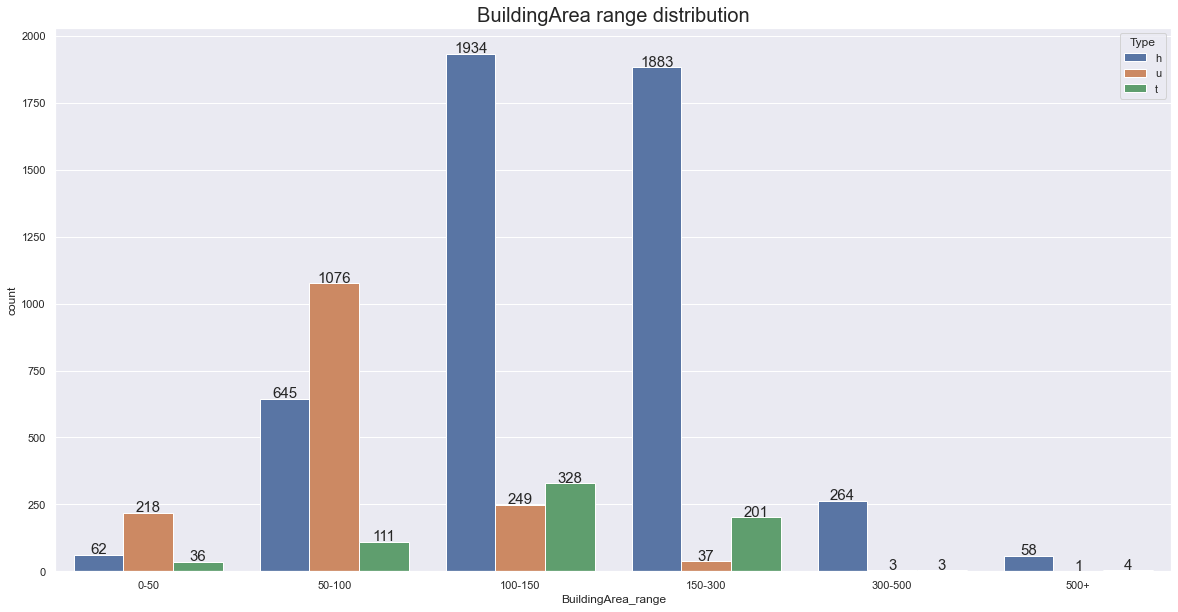

In [38]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x='BuildingArea_range',hue = 'Type', data=df_melb)
axis.set_title('BuildingArea range distribution on types',fontsize=20)
Mark_numbers(axis,15)

In [199]:
#figure, axis = plt.subplots(figsize=(20, 10))
#axis = sns.countplot(x='BuildingArea_range',hue = 'Price_range', data=df_melb)
#axis.set_title('BuildingArea range distribution on price range',fontsize=20)
#Mark_numbers(axis,15)

## BuildingArea range distribution on price range (plotly pie chart)
    The largest distribution of housing in the 0-50 sqm price range is in the 0-500,000 range, accounting for 63% of the total.
    The highest price range for housing in the 50-100 sqm range is 500,000-750,000 (40.8%) and 29.2% in the 0-500,000 range.
    The highest price range for housing in the 100-150 sqm range is in the 750,000-1,000,000 range, accounting for 29.8%, while 500,000-1,000,000 and 1,000,000-1,500,000 also account for a large number of units, both exceeding 25%.
    The price range of 150-300 sqm housing is most distributed in the range of 1,000,000-1,500,000, accounting for 31.3%, another 750,000-1,000,000, 1,500,000-2,000,000 also occupy a certain proportion, respectively 17.3% and 22.3%.
    The price range of 300-500 sqm housing is most distributed in the range of 2,000,000+, with 57.4%, while 1,000,000-1,500,000 and 1,500,000-2,000,000 also occupy a certain proportion, 14.8% and 17% respectively.

In [209]:
BuildingArea_range_df = df_melb[['BuildingArea_range','Price_range']].groupby('BuildingArea_range')['Price_range'].value_counts().reset_index(name='count').sort_values(['BuildingArea_range','Price_range'], ascending=(True,True))
#print(BuildingArea_range_df)
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}], [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=2, cols=3, specs=specs,subplot_titles=cut_labels3)
# Define pie charts
fig.add_trace(go.Pie(labels=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='0-50']['Price_range'], 
                     values=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='0-50']['count'],
                     name='0-50'), 1, 1)
fig.add_trace(go.Pie(labels=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='50-100']['Price_range'], 
                     values=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='50-100']['count'],
                     name='50-100'), 1, 2)
fig.add_trace(go.Pie(labels=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='100-150']['Price_range'], 
                     values=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='100-150']['count'],
                     name='100-150'), 1, 3)
fig.add_trace(go.Pie(labels=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='150-300']['Price_range'], 
                     values=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='150-300']['count'],
                     name='150-300'), 2, 1)
fig.add_trace(go.Pie(labels=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='300-500']['Price_range'], 
                     values=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='300-500']['count'],
                     name='300-500'), 2, 2)
fig.add_trace(go.Pie(labels=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='500+']['Price_range'], 
                     values=BuildingArea_range_df[BuildingArea_range_df['BuildingArea_range']=='500+']['count'],
                     name='500+'), 2, 3)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name+value')
fig.update(layout_title_text='BuildingArea range distribution on price range',
           layout_showlegend=True)

fig = go.Figure(fig)
fig.show()


In [40]:
#df_melb['Price'].plot(kind='hist',title='Distribution of House Prices in Melbourne')


## Boxplot of price in 3 types

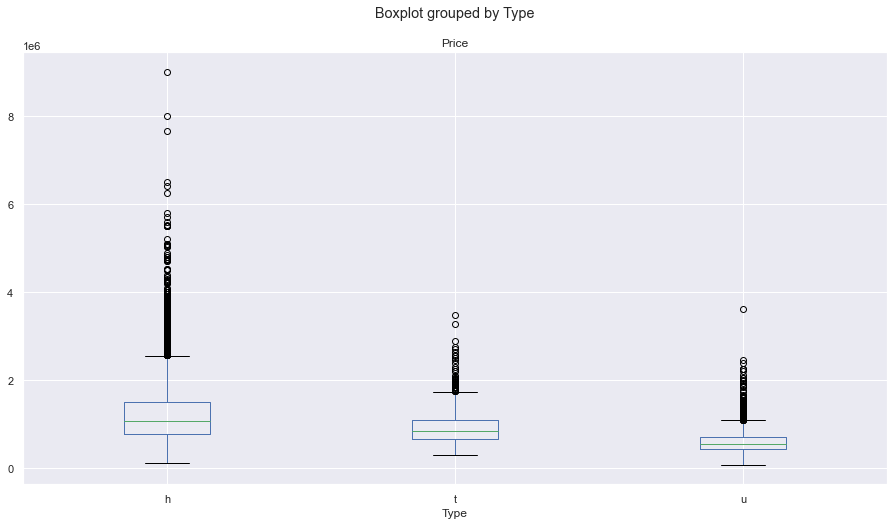

In [41]:
df_melb.boxplot(column='Price', by='Type')

## Average price distribution in different regions, types, Number of rooms,BuildingArea range.
    The district with the highest average selling price is South Metropolitan, over 1,350,000, lowest is western victoria,about 400,000.
    The average price of the three room types, the highest being house at over 1,200,000
    Basically, the more rooms and the larger the area, the higher the average room price.
    
    

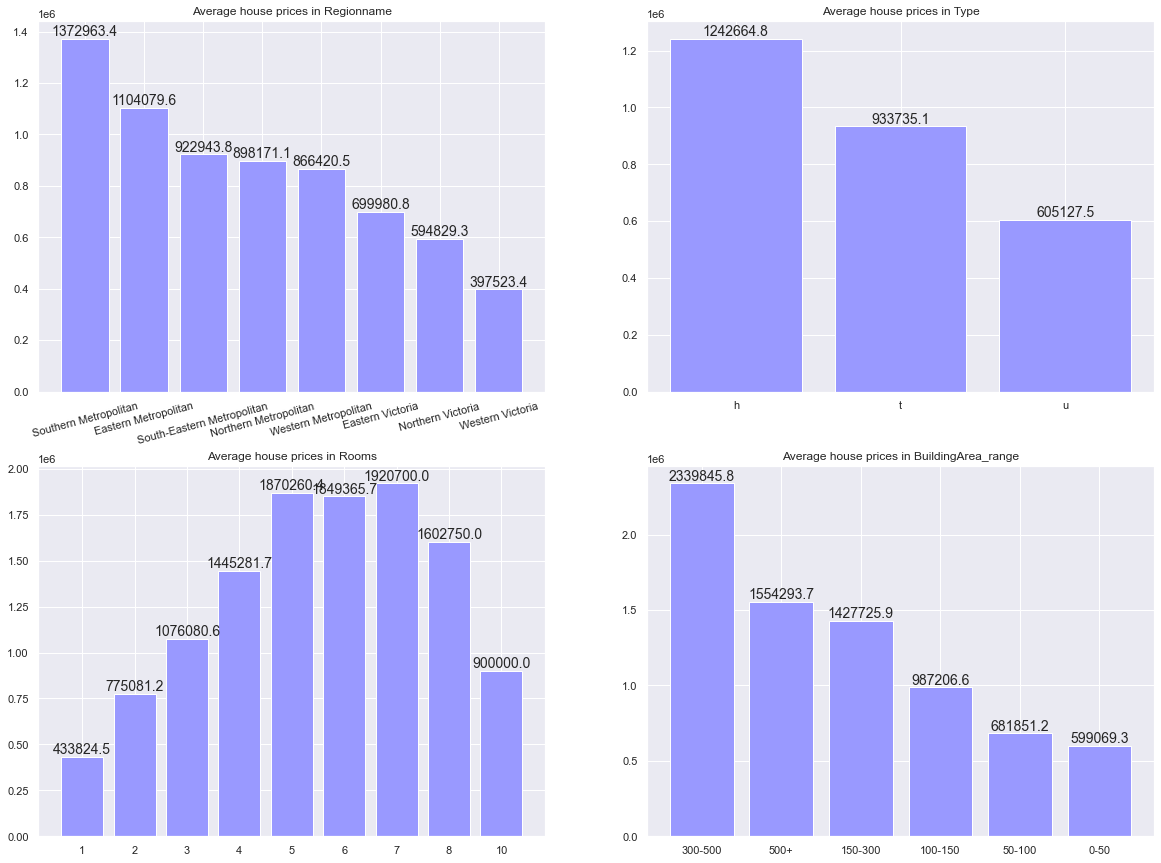

In [213]:
figure, axis = plt.subplots(2,2, figsize=(20, 15))
avg_price_bar('Regionname', axis[0,0])
avg_price_bar('Type', axis[0,1])
axis[0,0].tick_params(axis='x', labelrotation=15)
avg_price_bar('Rooms', axis[1,0])
avg_price_bar('BuildingArea_range', axis[1,1])


## Changes in the average price of different types of housing over time
    This graph shows the change in house prices with date for three types

(array([735964., 736055., 736146., 736238., 736330., 736420., 736511.,
        736603., 736695.]), <a list of 9 Text major ticklabel objects>)

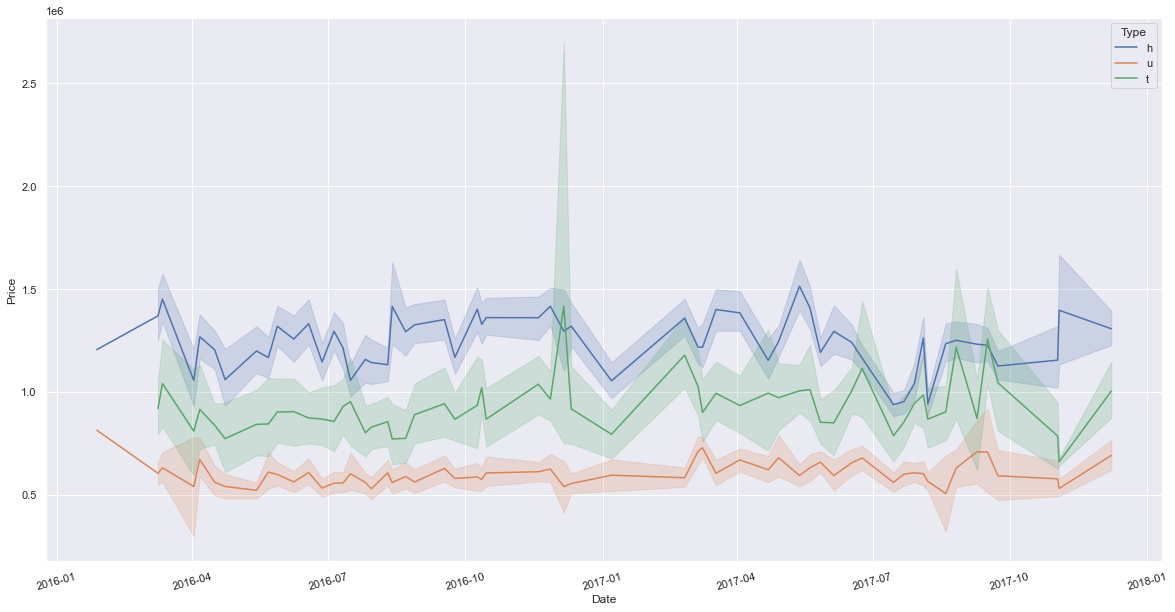

In [43]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.lineplot(x="Date", y="Price",hue = "Type", data=df_melb)

plt.xticks(rotation=15)

## Group the data set by month

In [222]:
months = df_melb[['Date','Price']].groupby(pd.Grouper(key='Date',freq='M')).mean().sort_values(by='Date', ascending=True).reset_index()
#print(months)

## Average monthly house price change.
    This graph shows the change in overall average house prices from month to month.

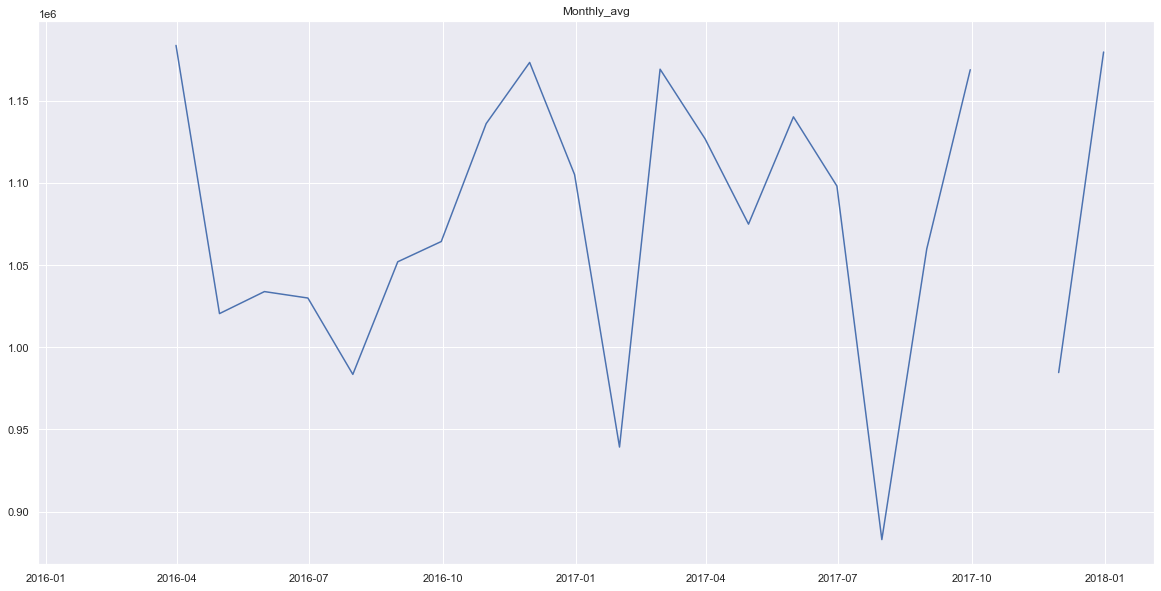

In [226]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = plt.plot(months['Date'], months['Price'])
plt.title('Monthly_avg')

plt.show()




## Average monthly price for different types of housing
    This graph shows the monthly change in average house prices for the three types. Overall, the average Price for house has largely remained between 1,200,000 and 1,400,000. Only in January and July 2017 was there a significant fall, even below 1,000,000 in July 2017
    For the most part, the trend in average house prices in the unites is similar to that of the houses, although there are some differences, more notably in November 2017, when the average house price in the unites reached its lowest point at 766,000, but prices in the houses rose during the same period

In [221]:
df_melb['month'] = df_melb['month'].astype(str)
df_melb['month'] = pd.to_datetime(df_melb['month'])
avg_d = df_melb[['month','Price','Type']].groupby(['month', 'Type']).mean().sort_values(by='month', ascending=True).reset_index()
#print(avg_d)

fig = px.line(avg_d, x="month", y="Price", color='Type')
fig.show()

In [225]:
#figure, axis = plt.subplots(figsize=(25, 12))
#avg_m = df_melb[['month','Price','Type']].groupby(['month', 'Type']).mean().sort_values(by='month', ascending=True).reset_index()
#axis = sns.barplot(x="month", y="Price",hue = "Type", data=avg_m, capsize=0,order = df_melb['month'].sort_values().unique())

#Mark_numbers(axis,12)
#plt.xticks(rotation=15)


In [224]:
#try plotly
#avg_price = df_melb[['Type','Price']].groupby('Type').mean().sort_values(by='Price', ascending=False)
#print(avg_price)
#fig = px.bar(avg_price, x=avg_price.index, y='Price')
#fig.show()
#fig = px.bar(avg_price, x = 'month',y = 'Price')
#fig.show()

In [71]:
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, len(df_melb['Type'].dropna())*x/100)

['h' 'u' 't']
h    9449
u    3017
t    1114
Name: Type, dtype: int64
69.5802628993988
22.216494381427765
8.203239738941193


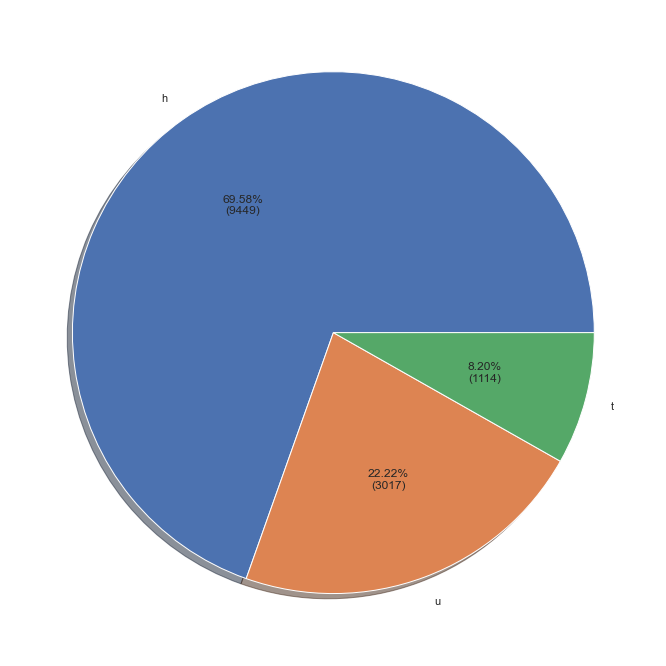

In [72]:
figure, axis = plt.subplots(figsize=(25, 12))
df_melb['Type'].sort_values() 
xx = df_melb['Type'].unique() 
yy = df_melb['Type'].value_counts()
print(xx)
print(yy)
axis = plt.pie(yy,labels=xx,autopct=my_fmt, shadow=True)
a=np.arange(len(xx))
#for a,b in zip(a, yy):
 #   axis.text(a, b,'%.0f'%b, ha='center', va='bottom', fontsize=10)
#axis.set_title('Distribution by ')  autopct=my_fmt,

In [223]:
#figure, axis = plt.subplots(figsize=(20, 10))
#axis = sns.countplot(x='CouncilArea',hue = 'Regionname', data=df_melb)
#axis.set_title('distance range distribution on price range',fontsize=20)
#Mark_numbers(axis,15)
#df_melb['CouncilArea'].describe()